In [38]:
import os
import numpy as np
from os import path as osp
import torch
import cv2
from torch.utils.data import Dataset
from PIL import Image
from skimage.morphology import disk, white_tophat, erosion, dilation
from scipy import ndimage as nd
import SimpleITK as sitk
from scipy.ndimage.morphology import binary_erosion


import nibabel as nib
%pylab
%matplotlib inline

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
### Patient ID here
patientID = "21109N"
# patientID = "10005Q"

In [3]:
### Load file
dirpath = "/pghbio/dbmi/batmanlab/Data/COPDGene/Images/{}/Phase-1/RAW/".format(patientID)
for r, dirs, files in os.walk(dirpath):
    files = list(filter(lambda x: 'INSP' in x and 'STD' in x and 'nii.gz' in x, files))
    ctscanfile = os.path.join(r, files[0])

In [4]:
### Load Lobes
dirpath = "/pghbio/dbmi/batmanlab/Data/COPDGene/Images/{}/Phase-1/LobeSegmentation/".format(patientID)
lobefiles = []
for r, dirs, files in os.walk(dirpath):
    files = list(map(lambda x: os.path.join(r, x), files))
    files = list(filter(lambda x: 'INSP' in x and 'STD' in x and 'Lobes' in x and '/.' not in x, files))
    lobefiles.extend(files)

In [5]:
ctscanfile

'/pghbio/dbmi/batmanlab/Data/COPDGene/Images/21109N/Phase-1/RAW/21109N_INSP_STD_COL_COPD.nii.gz'

In [6]:
lobefiles

['/pghbio/dbmi/batmanlab/Data/COPDGene/Images/21109N/Phase-1/LobeSegmentation/21109N_INSP_STD_COL_COPD/Lobes.mhd',
 '/pghbio/dbmi/batmanlab/Data/COPDGene/Images/21109N/Phase-1/LobeSegmentation/21109N_INSP_STD_COL_COPD/Lobes.zraw']

In [7]:
# img = nib.load(ctscanfile).get_fdata()
Img = sitk.ReadImage(ctscanfile)

In [8]:
img = sitk.GetArrayFromImage(Img)

In [9]:
img.shape

(645, 512, 512)

In [42]:
lab = sitk.ReadImage(lobefiles[0])

In [43]:
lab = sitk.GetArrayFromImage(lab)[:, ::-1] > 0

In [47]:
lab = binary_erosion(lab, np.ones((3,3,3)) > 0)

In [48]:
lab.shape

(645, 512, 512)

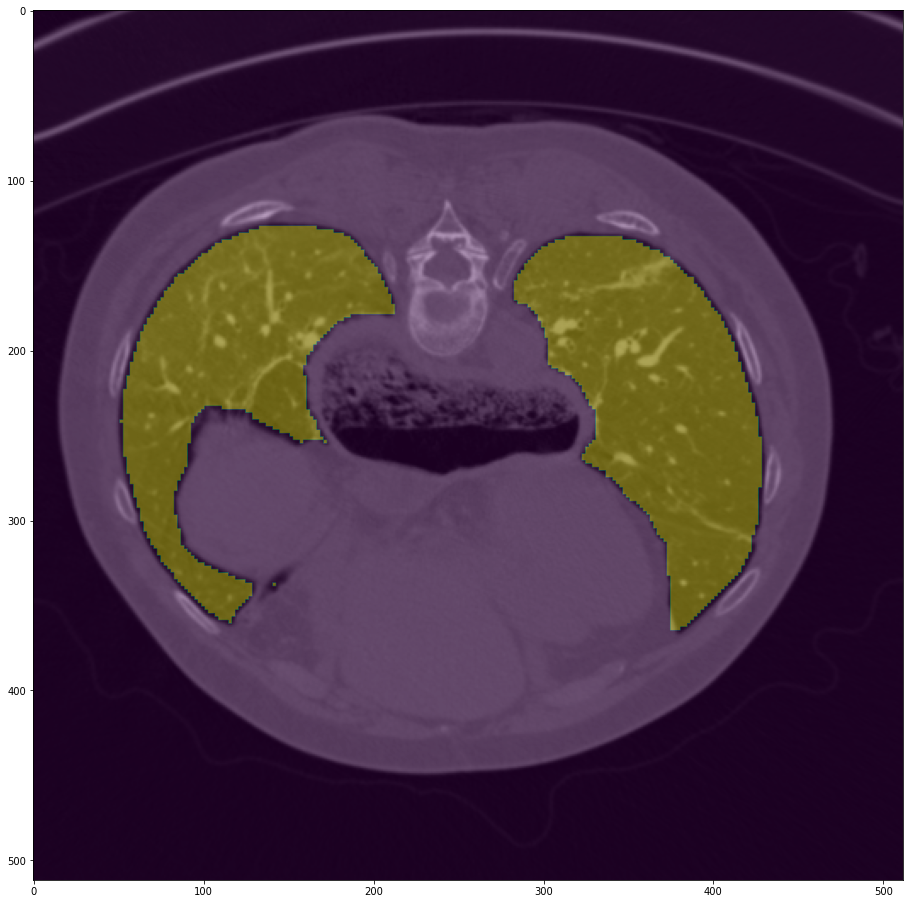

In [49]:
N = 220
plt.figure(figsize=(16,16))
plt.imshow(img[N], 'gray')
plt.imshow(lab[N], alpha=0.4)

In [31]:
print(set(list(lab.reshape(-1))))

{0, 1, 2, 3, 4, 5}


In [123]:
# sitk.WriteImage(sitk.GetImageFromArray(lab), './label.nii.gz')

In [124]:
# Img.GetMetaDataKeys()
# Img.SetMetaData
#########################################
## Set label
# Out = sitk.ImageFileWriter
# sitk.WriteImage

In [125]:
ctscanfile

'/pghbio/dbmi/batmanlab/Data/COPDGene/Images/21109N/Phase-1/RAW/21109N_INSP_STD_COL_COPD.nii.gz'

In [126]:
# cp '/pghbio/dbmi/batmanlab/Data/COPDGene/Images/21109N/Phase-1/RAW/21109N_INSP_STD_COL_COPD.nii.gz' 'scan.nii.gz'

In [73]:
# cp '/pghbio/dbmi/batmanlab/Data/COPDGene/Images/21109N/Phase-1/LobeSegmentation/21109N_INSP_STD_COL_COPD/Lobes.mhd' 'lobes.mhd'

In [74]:
# cp '/pghbio/dbmi/batmanlab/Data/COPDGene/Images/21109N/Phase-1/LobeSegmentation/21109N_INSP_STD_COL_COPD/Lobes.zraw' 'lobes.zraw'

In [127]:
labr = sitk.ReadImage('label.nii.gz')
labr = sitk.GetArrayFromImage(labr)

In [128]:
labr.shape

(645, 512, 512)

## Check metadata

In [130]:
lab = nib.load('label.nii.gz').get_fdata()

In [88]:
print(img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 512 512 645   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [1.       0.626955 0.626955 0.499998 0.       0.       0.       0.      ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : unknown
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 1.0
qoffset_x       : 172.187
qoffset_y       : 303.187
qoffset_z       : -348.